# Unlocking Safaricom’s Future: Predicting the Stock Price of Kenya's telecom giant

Members: 

Jackline Njuguna

Vitelis Siocha

Angel Atungire

Elsie Ochieng

Flavine Atieno

Evans Machua

## Project Overview
### 1.  	Introduction:
Our project revolves around leveraging time-series analysis to predict Safaricom's stock prices. Using advanced analytics on historical market data and key macroeconomic factors, we aim to extract crucial insights and build a robust predictive model for future stock prices.

### History of Safaricom Company

Safaricom, a telecommunications service provider based in Kenya was established in 1997 as a wholly-owned subsidiary of Telkom Kenya. The company offers a diverse range of services including SMS, voice, data, Internet, and M-PESA services.Safaricom provides high-speed data connectivity facilitating access to email, Internet, and corporate networks via fixed and mobile broadband. The company also offers a variety of devices including mobile handsets, broadband modems, routers, tablets, notebooks, and laptops. With a wide dealership network comprising approximately 2,700 outlets, Safaricom ensures extensive distribution of its products and services to consumers and businesses alike.
 In May 2000, Vodafone Group PLC of the United Kingdom acquired a 40% stake in Safaricom along with management responsibilities. Subsequently, in 2008, the Kenyan government offered 25% of its shares to the public through the Nairobi Securities Exchange.

### Safaricom Stocks

Public debut:

Safaricom went public on the Nairobi Securities Exchange (NSE) in June 2008, offering 25% of its shares and trades under the ticker symbol “SCOM”.The initial public offering (IPO) was highly successful, raising over KES 50 billion and setting a record for the largest IPO in East and Central Africa at the time.

Early Growth:

Following the IPO, SCOM experienced a period of significant growth, reflecting the company's strong performance in the Kenyan mobile market.This impressive growth was driven by factors like increasing mobile phone penetration, expansion of M-PESA mobile money services, and diversification into new areas like broadband and enterprise solutions.

Challenges and Decline:

From 2015 onwards, SCOM encountered several challenges that impacted its stock performance such as increased competition from other mobile operators, regulatory changes, and economic slowdown in Kenya all which contributed to a decline in the stock price.
Despite the challenges, Safaricom remains a dominant player in the Kenyan market with a strong brand and established infrastructure.The company is investing in new areas like 5G technology and digital services, which could drive future growth.However, the future performance of SCOM will depend on its ability to navigate the competitive landscape, adapt to regulatory changes, and capitalize on new opportunities.


### 2.  	Problem Statement
The challenge lies in the inherent unpredictability of Safaricom's stock movements. Our focus is on constructing a robust predictive model through advanced time-series analysis to unravel critical patterns in Safaricom's historical data. This predictive model aims to offer a reliable forecast of future stock prices, aiding stakeholders in navigating the complex and uncertain financial markets.
### 3.  	Objectives
#### Main Objectives
- Develop a robust time-series forecasting model for Safaricom's stock prices.
#### Specific Objectives
1. To Identify opportune times to buy and sell Safaricom stocks to maximize returns by analyzing historical data, market trends and economic indicators to pinpoint optimal entry and exit points for various project stakeholders.
2. To integrate market sentiment analysis to quantify external factors influencing Safaricom stock prices, leveraging sentiment scores from news, economic indicators, and regulatory changes.
3. To conduct sensitivity analysis to assess how inflation rate variations, interest rate, and GDP affect the model's predictions. This can be achieved by simulating different economic scenarios above and understanding how these changes affect stock price forecasts.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers, Model
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU, Attention
from tensorflow.keras.layers import Input
from keras import optimizers
from keras.optimizers import Adam
from fbprophet import Prophet
sns.set(style="whitegrid")
# Ignore documentation warnings
warnings.filterwarnings("ignore", category=UserWarning)


#### Load the data and view the dataframes

In [2]:
# Load historical prices data

historical_prices_df = pd.read_csv('Data/HistoricalPrices.csv')

# Display the first few rows of the data
historical_prices_df

,Date,Open,High,Low,Close,Volume
0,29/12/2023,14.00,14.00,13.80,13.90,396700
1,28/12/2023,13.90,14.10,13.60,13.70,5262500
2,27/12/2023,13.55,14.00,13.50,13.60,14199200
3,22/12/2023,13.80,13.80,13.50,13.55,1740200
4,21/12/2023,13.80,13.80,13.50,13.55,5824300
...,...,...,...,...,...,...
3495,8/1/2010,4.95,5.00,5.00,5.00,37595102
3496,7/1/2010,4.80,4.95,4.95,4.95,22382600
3497,6/1/2010,4.60,4.80,4.80,4.80,3856500
3498,5/1/2010,4.55,4.60,4.60,4.60,1965900


In [3]:
# Load and view the annual GDP data
annual_GDP_df = pd.read_csv('Data/kenya-gdp-growth-rate.csv')
annual_GDP_df

,date,GDP_Growth_(%),Annual_Change
0,31/12/1961,-7.7746,NaN
1,31/12/1962,9.4574,17.23
2,31/12/1963,8.7783,-0.68
3,31/12/1964,4.9645,-3.81
4,31/12/1965,2.0091,-2.96
...,...,...,...
57,31/12/2018,5.6479,1.81
58,31/12/2019,5.1142,-0.53
59,31/12/2020,-0.2728,-5.39
60,31/12/2021,7.5905,7.86


In [4]:
# Load and view the inflation rate dataset
inflation_rate_df = pd.read_csv('Data/Inflation_Rates.csv')
inflation_rate_df

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2007,April,4.69,1.85
1,2007,May,4.47,1.96
2,2007,March,4.99,2.19
3,2007,February,5.55,3.02
4,2010,October,4.12,3.18
...,...,...,...,...
224,2008,October,14.13,18.74
225,2011,October,11.49,18.91
226,2011,December,14.02,18.93
227,2008,November,15.25,19.54


In [5]:
# load and view the interest rates data
interest_rate_df = pd.read_csv('Data/central_bank_interest_rates.csv')
interest_rate_df

,Year,Month,Repo,Reverse_Repo,Interbank_Rate,91-Day Tbill,182-days Tbill,364-days Tbill,Cash_Reserve_Requirement,Central_Bank_Rate
0,1991,Jul,-,-,NaN,17.14,-,-,-,-
1,1991,Aug,-,-,NaN,16.70,-,-,-,-
2,1991,Sep,-,-,NaN,17.18,-,-,-,-
3,1991,Oct,-,-,NaN,17.78,-,-,NaN,NaN
4,1991,Nov,-,-,NaN,16.95,-,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
384,2023,July,8.73,12.09,10.34,12.12,12.23,12.46,4.25,10.5
385,2023,August,9.71,14.48,12.57,13.25,13.19,13.55,4.25,10.5
386,2023,September,-,13.76,12.36,14.38,14.46,14.42,4.25,10.5
387,2023,October,-,12.54,12.70,14.96,15.03,15.26,4.25,10.5


In [6]:
# Load and view the dividend_yield data
dividend_yield_df = pd.read_csv('Data/Dividend_Yield.csv')
dividend_yield_df

,Declare Date,Div date,Pay Date,Amount (Ksh)
0,12/05/2014,17/09/2014,15/12/2014,0.47
1,02/06/2015,04/09/2015,02/12/2015,0.64
2,26/07/2016,05/09/2016,01/12/2016,0.68
3,11/05/2016,05/09/2016,01/12/2016,0.78
4,10/05/2017,18/09/2017,01/12/2017,0.97
5,09/05/2018,03/09/2018,30/11/2018,1.10
6,03/05/2019,03/09/2019,30/11/2019,0.62
7,03/05/2019,03/09/2019,30/11/2019,1.25
8,29/04/2020,03/08/2020,31/08/2020,1.40
9,11/02/2021,08/03/2021,31/03/2021,0.45


### Data Understanding and Preparation/Cleaning 

##### a. Understanding and preparation/cleaning Historical Safaricom's Stock Prices Data

In [7]:
historical_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3500 non-null   object 
 1    Open    3500 non-null   float64
 2    High    3500 non-null   float64
 3    Low     3500 non-null   float64
 4    Close   3500 non-null   float64
 5    Volume  3500 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 164.2+ KB


The Safaricom stock prices dataset has 6 columns and 3500 rows without missing values. However, the 'Date' column is not recognized as a date. This needs attention for accurate time-related analysis.

In [8]:
# Converts the 'Date' column to a datetime format
historical_prices_df['Date'] = pd.to_datetime(historical_prices_df['Date'], dayfirst=True)

# Check the updated data types
historical_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3500 non-null   datetime64[ns]
 1    Open    3500 non-null   float64       
 2    High    3500 non-null   float64       
 3    Low     3500 non-null   float64       
 4    Close   3500 non-null   float64       
 5    Volume  3500 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 164.2 KB


The 'Date' column is now in datetime format. Next, we check the descriptive statistics of the past Safaricom stock prices

In [9]:
historical_prices_df.describe()

,Open,High,Low,Close,Volume
count,3500.000000,3500.000000,3500.000000,3500.000000,3.500000e+03
mean,18.621900,18.853343,18.361731,18.573914,1.057077e+07
std,11.225705,11.352001,11.062899,11.193927,1.255753e+07
min,2.750000,2.800000,2.700000,2.750000,1.028000e+05
25%,7.100000,7.200000,7.050000,7.100000,3.371550e+06
50%,17.200000,17.400000,17.000000,17.150000,7.016000e+06
75%,27.950000,28.100000,27.500000,27.750000,1.304995e+07
max,45.000000,45.250000,44.000000,44.950000,2.084859e+08


In [10]:
# Reset the index
historical_prices_df = historical_prices_df.set_index('Date')
historical_prices_df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-29,14.0,14.0,13.8,13.9,396700
2023-12-28,13.9,14.1,13.6,13.7,5262500


Descriptive statistics for Safaricom stock prices show the mean closing price around 18.57, with a minimum of 2.75 and a maximum of 44.95. The standard deviation is approximately 11.22. The dataset spans from January 4, 2010, to December 29, 2023.

##### b. Understanding and preparation/cleaning annual GDP data

In [11]:
annual_GDP_df

,date,GDP_Growth_(%),Annual_Change
0,31/12/1961,-7.7746,NaN
1,31/12/1962,9.4574,17.23
2,31/12/1963,8.7783,-0.68
3,31/12/1964,4.9645,-3.81
4,31/12/1965,2.0091,-2.96
...,...,...,...
57,31/12/2018,5.6479,1.81
58,31/12/2019,5.1142,-0.53
59,31/12/2020,-0.2728,-5.39
60,31/12/2021,7.5905,7.86


As our stock prices data starts in 2010, we trim the annual GDP data to begin from the same year. This ensures consistency in time series analysis across both datasets. Before adjusting the start time, we need more information about this data

In [12]:
annual_GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             62 non-null     object 
 1    GDP_Growth_(%)  62 non-null     float64
 2    Annual_Change   61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


The annual GDP dataset has 3 columns 24 rows without missing values. However, the 'Year' column is recognized to have integer data type instead of datetime. This needs attention for accurate time-related analysis.

In [13]:
# Rename the 'date' column to 'Date'
annual_GDP_df.rename(columns={'date': 'Date'}, inplace=True)

# Converts the 'Date' column to a datetime format
annual_GDP_df['Date'] = pd.to_datetime(annual_GDP_df['Date'], dayfirst=True)

# Display information about the DataFrame
annual_GDP_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             62 non-null     datetime64[ns]
 1    GDP_Growth_(%)  62 non-null     float64       
 2    Annual_Change   61 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.6 KB


We now align the annual GDP data starting from 2010 for consistent time series analysis

In [14]:
# Reset the index
annual_GDP_df = annual_GDP_df.set_index('Date')
# Ensure the start year is 2010
annual_GDP_df = annual_GDP_df['2010':]
annual_GDP_df

,GDP_Growth_(%),Annual_Change
Date,,
2010-12-31,8.0585,4.75
2011-12-31,5.1211,-2.94
2012-12-31,4.5687,-0.55
2013-12-31,3.7978,-0.77
2014-12-31,5.0201,1.22
2015-12-31,4.9677,-0.05
2016-12-31,4.2135,-0.75
2017-12-31,3.8380,-0.38
2018-12-31,5.6479,1.81


Descriptive Statistics of Annual GDP Data

In [15]:
annual_GDP_df.describe()

,GDP_Growth_(%),Annual_Change
count,13.0000,13.000000
mean,4.8086,0.118462
std,1.9888,3.366665
min,-0.2728,-5.390000
25%,4.2135,-0.770000
50%,4.9677,-0.530000
75%,5.1211,1.220000
max,8.0585,7.860000


Kenya reached its highest annual GDP of 8.0585% in 2010-2022, while the lowest was -0.2728%. The average annual GDP growth rate during this period was 4.8086%.

In [16]:
# Checking for missing values
annual_GDP_df.isna().sum()

 GDP_Growth_(%)    0
 Annual_Change     0
dtype: int64

No missing values in the annual GDP Data.

##### c. Understanding and preparation/cleaning inflation rates Data

In [17]:
inflation_rate_df.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2007,April,4.69,1.85
1,2007,May,4.47,1.96
2,2007,March,4.99,2.19
3,2007,February,5.55,3.02
4,2010,October,4.12,3.18


The columns labeled as 'Unnamed' are empty, so we remove them to retain only columns with actual data

In [18]:
# Drop columns with 'Unnamed' label
inflation_rate_df = inflation_rate_df.loc[:, ~inflation_rate_df.columns.str.startswith('Unnamed')]

# Display the updated DataFrame
inflation_rate_df.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2007,April,4.69,1.85
1,2007,May,4.47,1.96
2,2007,March,4.99,2.19
3,2007,February,5.55,3.02
4,2010,October,4.12,3.18


We now align the inflation rate dataset starting from 2010 for consistent time series analysis. But first let's redefine our date columns and set to index.

In [19]:
# Map month names to corresponding numerical values
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Convert 'Month' column to numerical values
inflation_rate_df['Month'] = inflation_rate_df['Month'].map(month_dict)
inflation_rate_df

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2007,4,4.69,1.85
1,2007,5,4.47,1.96
2,2007,3,4.99,2.19
3,2007,2,5.55,3.02
4,2010,10,4.12,3.18
...,...,...,...,...
224,2008,10,14.13,18.74
225,2011,10,11.49,18.91
226,2011,12,14.02,18.93
227,2008,11,15.25,19.54


As inflation rates in Kenya are typically announced at the end of each month, we'll add a new column called 'Date' by combining information from the 'Year' and 'Month' columns to represent the full date with day, month, and year.

In [20]:
from calendar import monthrange
# Create a new column with the last date of each month
inflation_rate_df['Date'] = inflation_rate_df.apply(lambda row: pd.Timestamp(f"{int(row['Year'])}-{int(row['Month'])}-{monthrange(int(row['Year']), int(row['Month']))[1]}"), axis=1)

# Display the DataFrame with the new column
print(inflation_rate_df)


     Year  Month  Annual Average Inflation  12-Month Inflation       Date
0    2007      4                      4.69                1.85 2007-04-30
1    2007      5                      4.47                1.96 2007-05-31
2    2007      3                      4.99                2.19 2007-03-31
3    2007      2                      5.55                3.02 2007-02-28
4    2010     10                      4.12                3.18 2010-10-31
..    ...    ...                       ...                 ...        ...
224  2008     10                     14.13               18.74 2008-10-31
225  2011     10                     11.49               18.91 2011-10-31
226  2011     12                     14.02               18.93 2011-12-31
227  2008     11                     15.25               19.54 2008-11-30
228  2011     11                     12.82               19.72 2011-11-30

[229 rows x 5 columns]


We set this new column as the index of the inflation rates Dataset. Then, we filter on data starting from 2010 for consistency.

In [21]:
# Slice the dataset as from 2010
inflation_rate_df = inflation_rate_df.set_index('Date')
inflation_rate_df = inflation_rate_df['2010-01-31':]
inflation_rate_df

,Year,Month,Annual Average Inflation,12-Month Inflation
Date,,,,
2010-01-31,2010,1,8.64,5.95
2015-09-30,2015,9,6.29,5.97
2020-04-30,2020,4,6.03,6.01
2014-12-31,2014,12,6.88,6.02
2013-07-31,2013,7,4.44,6.03
...,...,...,...,...
2008-10-31,2008,10,14.13,18.74
2011-10-31,2011,10,11.49,18.91
2011-12-31,2011,12,14.02,18.93


##### d. Understanding and preparation/cleaning interest rates data

In [22]:
interest_rate_df.head()

,Year,Month,Repo,Reverse_Repo,Interbank_Rate,91-Day Tbill,182-days Tbill,364-days Tbill,Cash_Reserve_Requirement,Central_Bank_Rate
0,1991,Jul,-,-,NaN,17.14,-,-,-,-
1,1991,Aug,-,-,NaN,16.70,-,-,-,-
2,1991,Sep,-,-,NaN,17.18,-,-,-,-
3,1991,Oct,-,-,NaN,17.78,-,-,NaN,NaN
4,1991,Nov,-,-,NaN,16.95,-,-,NaN,NaN


In [23]:
# Map month names to corresponding numerical values
month_dict = {'January': 1, 'Jan': 1, 'February': 2, 'Feb': 2, 'March': 3, 'Mar': 3, 'April': 4, 'Apr': 4,
              'May': 5, 'June': 6, 'Jun': 6, 'July': 7, 'Jul': 7, 'August': 8, 'Aug': 8, 'September': 9, 'Sep': 9,
              'October': 10, 'Oct': 10, 'November': 11, 'Nov': 11, 'December': 12, 'Dec': 12}

# Convert 'Month' column to numerical values
interest_rate_df['Month'] = interest_rate_df['Month'].map(month_dict)
interest_rate_df

,Year,Month,Repo,Reverse_Repo,Interbank_Rate,91-Day Tbill,182-days Tbill,364-days Tbill,Cash_Reserve_Requirement,Central_Bank_Rate
0,1991,7.0,-,-,NaN,17.14,-,-,-,-
1,1991,8.0,-,-,NaN,16.70,-,-,-,-
2,1991,9.0,-,-,NaN,17.18,-,-,-,-
3,1991,10.0,-,-,NaN,17.78,-,-,NaN,NaN
4,1991,11.0,-,-,NaN,16.95,-,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
384,2023,7.0,8.73,12.09,10.34,12.12,12.23,12.46,4.25,10.5
385,2023,8.0,9.71,14.48,12.57,13.25,13.19,13.55,4.25,10.5
386,2023,9.0,-,13.76,12.36,14.38,14.46,14.42,4.25,10.5
387,2023,10.0,-,12.54,12.70,14.96,15.03,15.26,4.25,10.5


In [24]:
# Handle missing values in 'Month' column
interest_rate_df['Month'].fillna(0, inplace=True)
interest_rate_df['Month'] = interest_rate_df['Month'].astype(int)

# Create a new column with the first date of each month
interest_rate_df['Date'] = interest_rate_df.apply(lambda row: pd.Timestamp(f"{int(row['Year'])}-{int(row['Month']) if row['Month'] != 0 else 1}-01"), axis=1)

# Display the DataFrame with the new column
interest_rate_df

,Year,Month,Repo,Reverse_Repo,Interbank_Rate,91-Day Tbill,182-days Tbill,364-days Tbill,Cash_Reserve_Requirement,Central_Bank_Rate,Date
0,1991,7,-,-,NaN,17.14,-,-,-,-,1991-07-01
1,1991,8,-,-,NaN,16.70,-,-,-,-,1991-08-01
2,1991,9,-,-,NaN,17.18,-,-,-,-,1991-09-01
3,1991,10,-,-,NaN,17.78,-,-,NaN,NaN,1991-10-01
4,1991,11,-,-,NaN,16.95,-,-,NaN,NaN,1991-11-01
...,...,...,...,...,...,...,...,...,...,...,...
384,2023,7,8.73,12.09,10.34,12.12,12.23,12.46,4.25,10.5,2023-07-01
385,2023,8,9.71,14.48,12.57,13.25,13.19,13.55,4.25,10.5,2023-08-01
386,2023,9,-,13.76,12.36,14.38,14.46,14.42,4.25,10.5,2023-09-01
387,2023,10,-,12.54,12.70,14.96,15.03,15.26,4.25,10.5,2023-10-01


In [25]:
# Sliced dataset according to dates
interest_rate_df = interest_rate_df.set_index('Date')
interest_rate_df = interest_rate_df['2010-01-01':]
interest_rate_df

,Year,Month,Repo,Reverse_Repo,Interbank_Rate,91-Day Tbill,182-days Tbill,364-days Tbill,Cash_Reserve_Requirement,Central_Bank_Rate
Date,,,,,,,,,,
2010-01-01,2010,1,-,3.91,3.69,6.56,7.02,-,4.5,7
2010-02-01,2010,2,-,2.8,2.39,6.21,6.61,7.38,4.5,7
2010-03-01,2010,3,-,2.43,2.21,5.98,6.34,-,4.5,6.75
2010-04-01,2010,4,-,2.46,2.46,5.17,5.58,6.01,4.5,6.75
2010-05-01,2010,5,-,2.41,2.16,4.21,4.41,-,4.5,6.75
...,...,...,...,...,...,...,...,...,...,...
2023-07-01,2023,7,8.73,12.09,10.34,12.12,12.23,12.46,4.25,10.5
2023-08-01,2023,8,9.71,14.48,12.57,13.25,13.19,13.55,4.25,10.5
2023-09-01,2023,9,-,13.76,12.36,14.38,14.46,14.42,4.25,10.5


##### e. Understanding and preparation/cleaning Safaricom's Dividend Yields Data

In [26]:
dividend_yield_df.head()

,Declare Date,Div date,Pay Date,Amount (Ksh)
0,12/05/2014,17/09/2014,15/12/2014,0.47
1,02/06/2015,04/09/2015,02/12/2015,0.64
2,26/07/2016,05/09/2016,01/12/2016,0.68
3,11/05/2016,05/09/2016,01/12/2016,0.78
4,10/05/2017,18/09/2017,01/12/2017,0.97


In [27]:
dividend_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Declare Date  20 non-null     object 
 1   Div date      20 non-null     object 
 2   Pay Date      20 non-null     object 
 3   Amount (Ksh)  20 non-null     float64
dtypes: float64(1), object(3)
memory usage: 768.0+ bytes


The dividend yield dataset is complete with no missing values. It consists of 20 rows and 4 columns. The only necessary transformation is changing the data type of the 'Pay Date' column from object to datetime.

In [28]:
# Rename the 'Pay Date' column to 'Date'
dividend_yield_df.rename(columns={'Pay Date': 'Date'}, inplace=True)

# Converts the 'Date' column to a datetime format
dividend_yield_df['Date'] = pd.to_datetime(dividend_yield_df['Date'], dayfirst=True)
dividend_yield_df

,Declare Date,Div date,Date,Amount (Ksh)
0,12/05/2014,17/09/2014,2014-12-15,0.47
1,02/06/2015,04/09/2015,2015-12-02,0.64
2,26/07/2016,05/09/2016,2016-12-01,0.68
3,11/05/2016,05/09/2016,2016-12-01,0.78
4,10/05/2017,18/09/2017,2017-12-01,0.97
5,09/05/2018,03/09/2018,2018-11-30,1.10
6,03/05/2019,03/09/2019,2019-11-30,0.62
7,03/05/2019,03/09/2019,2019-11-30,1.25
8,29/04/2020,03/08/2020,2020-08-31,1.40
9,11/02/2021,08/03/2021,2021-03-31,0.45


In [29]:
# Reset the index
dividend_yield_df = dividend_yield_df.set_index('Date')
dividend_yield_df = dividend_yield_df['2010-12-02':]
dividend_yield_df.head(2)

,Declare Date,Div date,Amount (Ksh)
Date,,,
2010-12-02,25/05/2010,02/09/2010,0.2
2009-11-12,21/05/2009,19/08/2009,0.1


In [30]:
# Descriptive statistics
dividend_yield_df.describe()

,Amount (Ksh)
count,2.000000
mean,0.150000
std,0.070711
min,0.100000
25%,0.125000
50%,0.150000
75%,0.175000
max,0.200000


##### Merge the above five dataframes and select crucial columns that will be used for stock prices analysis 

In [31]:
# List of dataframes
dfs = [historical_prices_df, annual_GDP_df, inflation_rate_df, interest_rate_df, dividend_yield_df]

# Sort the 'Date' column in each dataframe
for df in dfs:
    df.sort_values('Date', inplace=True)

# Create a base dataframe with the 'Date' column
base_df = pd.DataFrame({'Date': pd.date_range(start='2010-01-01', end='2023-12-31', freq='D')})

# Perform asof merges for each dataframe
for df in dfs:
    base_df = pd.merge_asof(base_df, df, on='Date')

# Selecting specific columns from the merged dataframe
selected_columns = [ ' Open', ' High', ' Low', ' Close', ' Volume', ' GDP_Growth_(%)', 'Annual Average Inflation', 'Central_Bank_Rate', 'Amount (Ksh)']
merged_df = base_df[['Date'] + selected_columns]

In [32]:
# Rename the columns for easier readability
# Define the new column names
new_column_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'GDP_Growth_Rate', 'Annual_Average_Inflation', 'Central_Bank_Rate', 'Dividend_Yield']

# Rename the columns
merged_df.columns = new_column_names
merged_df

,Date,Open,High,Low,Close,Volume,GDP_Growth_Rate,Annual_Average_Inflation,Central_Bank_Rate,Dividend_Yield
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,11.42,7,0.1
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,11.42,7,0.1
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,11.42,7,0.1
3,2010-01-04,4.55,4.55,4.55,4.55,2802800.0,NaN,11.42,7,0.1
4,2010-01-05,4.55,4.60,4.60,4.60,1965900.0,NaN,11.42,7,0.1
...,...,...,...,...,...,...,...,...,...,...
5108,2023-12-27,13.55,14.00,13.50,13.60,14199200.0,4.8466,7.87,10.5,0.2
5109,2023-12-28,13.90,14.10,13.60,13.70,5262500.0,4.8466,7.87,10.5,0.2
5110,2023-12-29,14.00,14.00,13.80,13.90,396700.0,4.8466,7.87,10.5,0.2
5111,2023-12-30,14.00,14.00,13.80,13.90,396700.0,4.8466,7.87,10.5,0.2


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5113 entries, 0 to 5112
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      5113 non-null   datetime64[ns]
 1   Open                      5110 non-null   float64       
 2   High                      5110 non-null   float64       
 3   Low                       5110 non-null   float64       
 4   Close                     5110 non-null   float64       
 5   Volume                    5110 non-null   float64       
 6   GDP_Growth_Rate           4749 non-null   float64       
 7   Annual_Average_Inflation  5113 non-null   float64       
 8   Central_Bank_Rate         5113 non-null   object        
 9   Dividend_Yield            5113 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 439.4+ KB


In [34]:
merged_df.isna().sum()

Date                          0
Open                          3
High                          3
Low                           3
Close                         3
Volume                        3
GDP_Growth_Rate             364
Annual_Average_Inflation      0
Central_Bank_Rate             0
Dividend_Yield                0
dtype: int64

The merged DataFrame consists of 4748 rows and 10 columns, exhibiting diverse data types. Certain columns, particularly ' Open', ' High', ' Low', ' Close' 'GDP_Growth_(%)' (364 missing) and 'Amount (Ksh)' (335 missing), contain missing values. An unexpected object categorization is observed in the 'Central_Bank_Rate' column. The absence of data is attributed to public holidays and weekends. Therefore we handle unexpected object categorization and the missing values as follows:

###### Missing Values
Columns with missing values represent information available at the conclusion of a specific timestamp. Consequently, we employ the back-fill method to fill these gaps and ensure a comprehensive dataset for subsequent analysis.

In [35]:
# Set the 'Date' Column Index
merged_df = merged_df.set_index('Date')
# Back-fill missing values in the DataFrame
merged_df = merged_df.fillna(method='bfill')

# Confirm missing values have been filled
merged_df.isna().sum()

Open                        0
High                        0
Low                         0
Close                       0
Volume                      0
GDP_Growth_Rate             0
Annual_Average_Inflation    0
Central_Bank_Rate           0
Dividend_Yield              0
dtype: int64

###### Unexpected Object Data type in Central_Bank_Rate column

In [36]:
# Convert 'Central_Bank_Rate' column to float
merged_df['Central_Bank_Rate'] = pd.to_numeric(merged_df['Central_Bank_Rate'])

# Display the DataFrame after the conversion
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5113 entries, 2010-01-01 to 2023-12-31
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Open                      5113 non-null   float64
 1   High                      5113 non-null   float64
 2   Low                       5113 non-null   float64
 3   Close                     5113 non-null   float64
 4   Volume                    5113 non-null   float64
 5   GDP_Growth_Rate           5113 non-null   float64
 6   Annual_Average_Inflation  5113 non-null   float64
 7   Central_Bank_Rate         5113 non-null   float64
 8   Dividend_Yield            5113 non-null   float64
dtypes: float64(9)
memory usage: 399.5 KB


## Exploratory Data Analysis

#### a. Stock Prices Trend

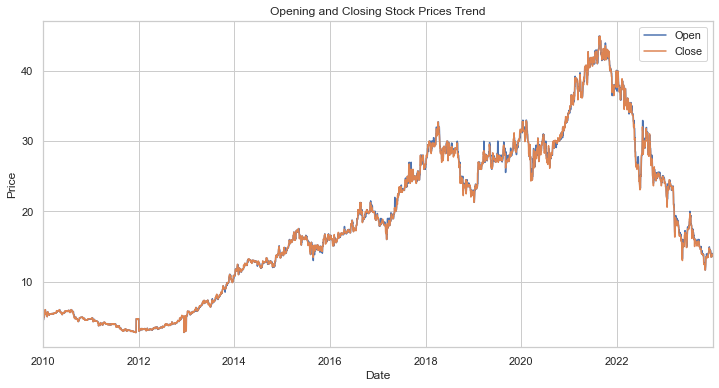

In [37]:
# Selecting ' Open', ' Close' columns for visualization
columns_to_plot = ['Open', 'Close']

# Plot the trend of selected columns
merged_df[columns_to_plot].plot(figsize=(12, 6), title='Opening and Closing Stock Prices Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

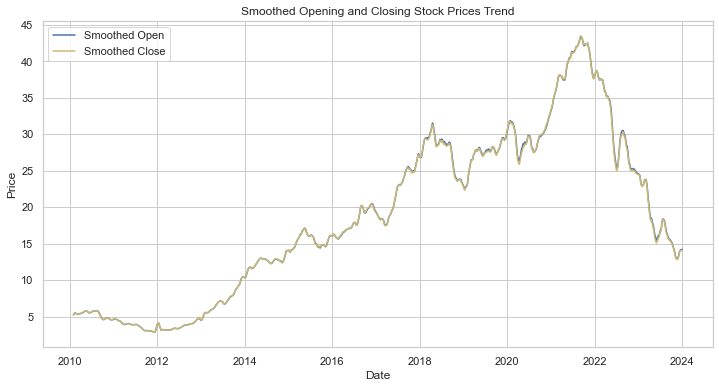

In [38]:
# Selecting 'Open' and 'Close' columns for visualization
columns_to_plot = ['Open', 'Close']

# Calculate the rolling averages with a window size of 30 days
window_size = 30
rolling_avg_open = merged_df['Open'].rolling(window=window_size).mean()
rolling_avg_close = merged_df['Close'].rolling(window=window_size).mean()

# Plotting the smoothed trend of selected columns
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, rolling_avg_open, label='Smoothed Open', color='b')
plt.plot(merged_df.index, rolling_avg_close, label='Smoothed Close', color='y')

plt.title('Smoothed Opening and Closing Stock Prices Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The opening and closing stock prices exhibit a close proximity and display an exponentially rising trend from 2010 to 2022. However, post-2022, there appears to be a struggle for a resurgence in the upward direction. This observation suggests a potential shift or change in the stock's performance dynamics during the latter period.

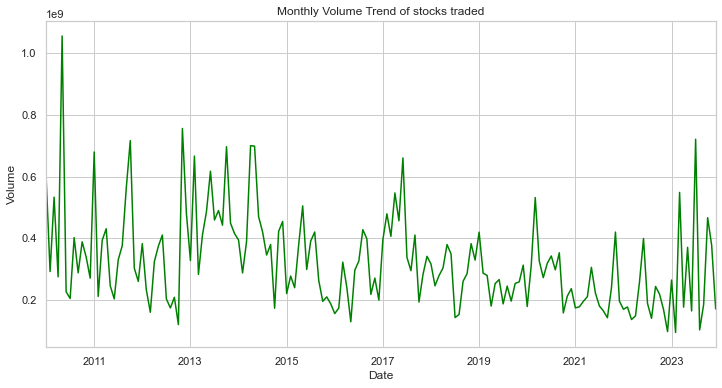

In [39]:
# Resample the data on a monthly basis and sum the volumes
monthly_volume = merged_df['Volume'].resample('M').sum()

# Plotting
monthly_volume.plot(figsize=(12, 6), title='Monthly Volume Trend of stocks traded', color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

Safaricom typically experiences high stock trading volumes at the start of the year. However, there has been a gradual decrease in the number of traded stocks over time.

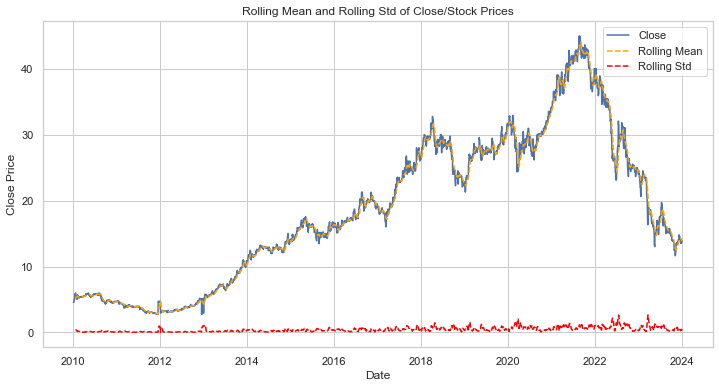

In [40]:
# Calculate rolling mean and rolling standard deviation for the 'Close' column
merged_df['Rolling_Mean'] = merged_df['Close'].rolling(window=20).mean()
merged_df['Rolling_Std'] = merged_df['Close'].rolling(window=20).std()

# # Plotting rolling mean, rolling standard deviation and close stock prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_df.index, y=merged_df['Close'], label='Close')
sns.lineplot(x=merged_df.index, y=merged_df['Rolling_Mean'], label='Rolling Mean', linestyle='--', color='orange')
sns.lineplot(x=merged_df.index, y=merged_df['Rolling_Std'], label='Rolling Std', linestyle='--', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Rolling Mean and Rolling Std of Close/Stock Prices')

# Adding legend
plt.legend()

# Display the plot
plt.show()

#### b. Stock Prices and Economic Factors

Below, we define a function that we use to visualize the relationship between each economic factor and the stock price. In this case, we focus on the close stock prices.

In [41]:
# Plotting the specified eonomic indicator and close stock price
def plot_close_with_eco_factor(dataframe, eco_factor, stock_prices, title, 
                               x_label, y_label, color=['red', 'blue']):
    dataframe[[eco_factor, stock_prices]].plot(figsize=(12, 6), title=title, color=color)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.show()

#### b. Stock Prices Vs Inflation Rates

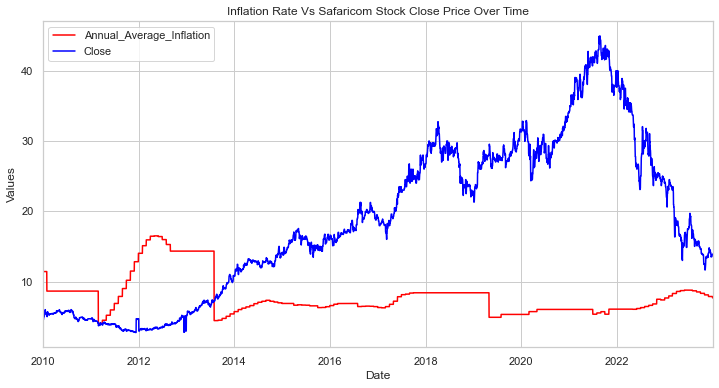

In [42]:
plot_close_with_eco_factor(merged_df, 'Annual_Average_Inflation', 'Close', 
                           'Inflation Rate Vs Safaricom Stock Close Price Over Time', 'Date', 
                           'Values')

#### c. Stock Prices Vs Interet Rates

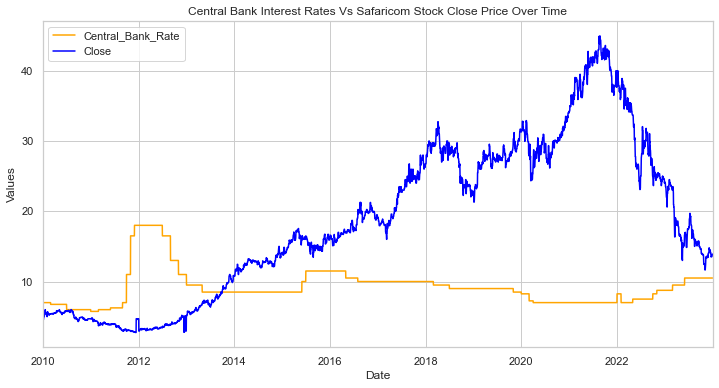

In [43]:
plot_close_with_eco_factor(merged_df, 'Central_Bank_Rate', 'Close', 
                           'Central Bank Interest Rates Vs Safaricom Stock Close Price Over Time', 'Date', 
                           'Values', color=['orange', 'blue'])

#### d. Stock Prices Vs GDP Growth Rate

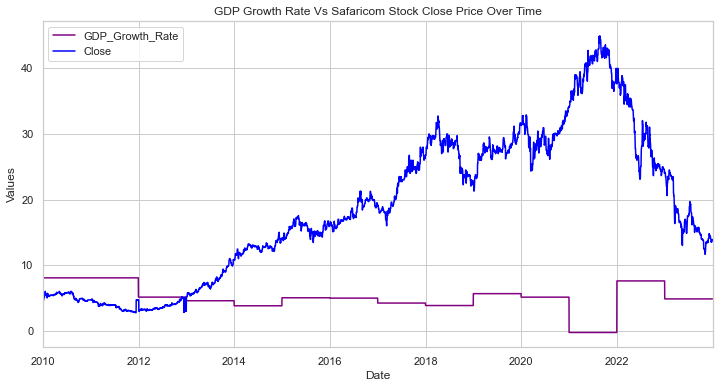

In [44]:
plot_close_with_eco_factor(merged_df, 'GDP_Growth_Rate', 'Close', 
                           'GDP Growth Rate Vs Safaricom Stock Close Price Over Time', 'Date', 
                           'Values', color=['purple', 'blue'])

#### e. Stock Prices Vs Dividend Yield

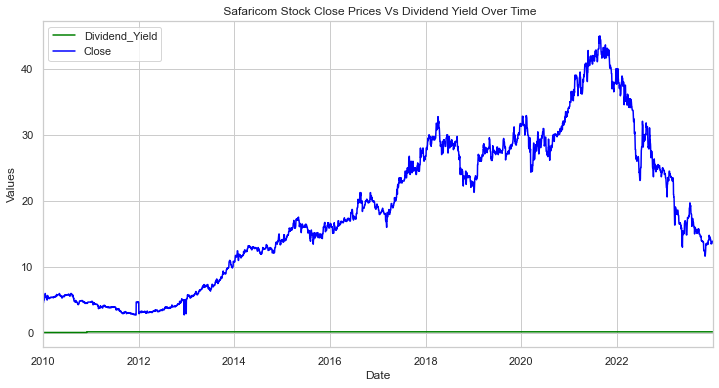

In [45]:
plot_close_with_eco_factor(merged_df, 'Dividend_Yield', 'Close', 
                           ' Safaricom Stock Close Prices Vs Dividend Yield Over Time', 'Date', 
                           'Values', color=['green', 'blue'])

### Tecnical Indicators

Technical indicators are mathematical tools used in the stock market to analyze past price and volume data, aiming to identify trends, gauge momentum, assess volatility, and potentially generate trading signals.

#### 1. Relative Strength Index(RSI)

Relative Strength Index measures the speed and change of price movements. It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions.
RSI values range from 0 to 100 and are often interpreted as overbought (greater than 70) or oversold (less than 30) conditions.

In [46]:
# Calculate daily price changes
delta = merged_df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate the average gain and average loss
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate the Relative Strength Index (RSI)
merged_df['RSI'] = 100 - (100 / (1 + rs))

#### RSI and Stock Prices
RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions in a market thus enabling us to make more informed decisions  about when to enter or exit trades. Some general interpretations of RSI values are as follows:

RSI above 70: Indicates that the stock may be overbought, and there could be a potential for a reversal or pullback in the price. It might be considered a signal to sell.

RSI below 30: Suggests that the stock may be oversold, and there could be a potential for a rebound or upward movement in the price. It might be considered a signal to buy.

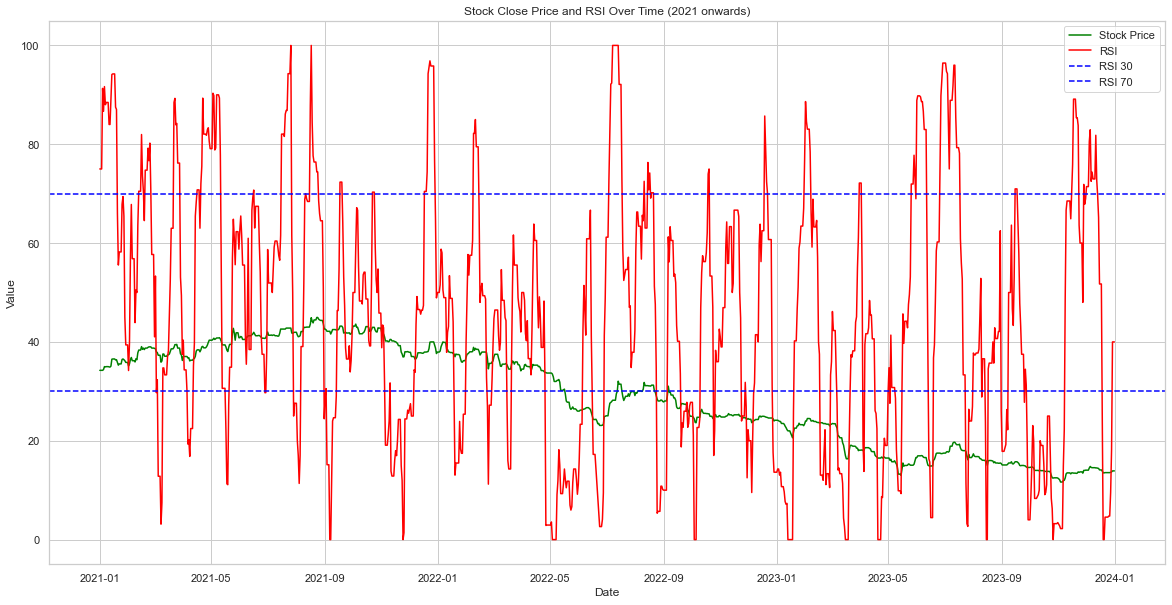

In [47]:
# Filter data from 2020 onwards
merged_df_2021 = merged_df.loc['2021-01-01':]

plt.figure(figsize=(20, 10))

# Plotting the original closing prices and RSI
plt.plot(merged_df_2021.index, merged_df_2021['Close'], label='Stock Price', color='green')
plt.plot(merged_df_2021.index, merged_df_2021['RSI'], label='RSI', color='red')

# Add dotted lines at RSI levels 30 and 70
plt.axhline(y=30, linestyle='--', color='blue', label='RSI 30')
plt.axhline(y=70, linestyle='--', color='blue', label='RSI 70')


plt.title('Stock Close Price and RSI Over Time (2021 onwards)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

**Overbought zones (RSI above 70):**

From the plot we can see that there are several periods throughout the period in question where the RSI was above 70 such as May and September 2021, January and August 2022, and February and August 2023. When the RSI remained above 70 for an extended period, this suggests sustained buying pressure. We noted that anytime the RSI was above 70, the stock prices were experiencing an upward trend that was the followed by price correction

**Oversold zones (RSI below 30):**
There were also several instances where the RSI dipped below 30 signifying oversold conditions for SCOM. Similarly, anytime the RSI was below 20, the stock prices were experiencing an downward trend.

Overbought signals haven't always resulted in immediate downtrends: While periods above 70 might indicate potential for correction, the SCOM price didn't always plummet right away. In some cases, like early 2023, the price remained flat or even continued rising slightly.
Oversold signals haven't guaranteed immediate rebounds: Similarly, dips below 30 haven't always been followed by immediate upswings. 

#### 2. Moving Average Convergence Divergence(MACD)

MACD consists of two lines: MACD line (the difference between two moving averages) and the signal line (a moving average of the MACD line).
MACD crossovers with the signal line can be associated with changes in trend direction

The choice of the EMA (Exponential Moving Average) periods, such as 12 and 26 days for MACD (Moving Average Convergence Divergence), and 9 days for the Signal Line, is based on historical convention and technical analysis practices. These specific values are commonly used and have become standard in many financial markets.

The 12-day EMA is considered a shorter-term indicator and responds more quickly to recent price changes.The 26-day EMA is considered a longer-term indicator and provides a smoother representation of the overall trend. the difference between the 2 is used to identify potential shifts in momentum.

The Signal Line, which is a 9-day EMA of the MACD, is used to generate signals for potential buy or sell opportunities.

In [48]:
# Calculate MACD
merged_df['26_EMA'] = merged_df['Close'].ewm(span=26, adjust=False).mean()
merged_df['12_EMA'] = merged_df['Close'].ewm(span=12, adjust=False).mean()
merged_df['MACD'] = merged_df['12_EMA'] - merged_df['26_EMA']

# Calculate Signal Line (9-day EMA of MACD)
merged_df['Signal_Line'] = merged_df['MACD'].ewm(span=9, adjust=False).mean()

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5113 entries, 2010-01-01 to 2023-12-31
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Open                      5113 non-null   float64
 1   High                      5113 non-null   float64
 2   Low                       5113 non-null   float64
 3   Close                     5113 non-null   float64
 4   Volume                    5113 non-null   float64
 5   GDP_Growth_Rate           5113 non-null   float64
 6   Annual_Average_Inflation  5113 non-null   float64
 7   Central_Bank_Rate         5113 non-null   float64
 8   Dividend_Yield            5113 non-null   float64
 9   Rolling_Mean              5094 non-null   float64
 10  Rolling_Std               5094 non-null   float64
 11  RSI                       5088 non-null   float64
 12  26_EMA                    5113 non-null   float64
 13  12_EMA                    5113 non-null   flo

#### MACD and Stock Prices   

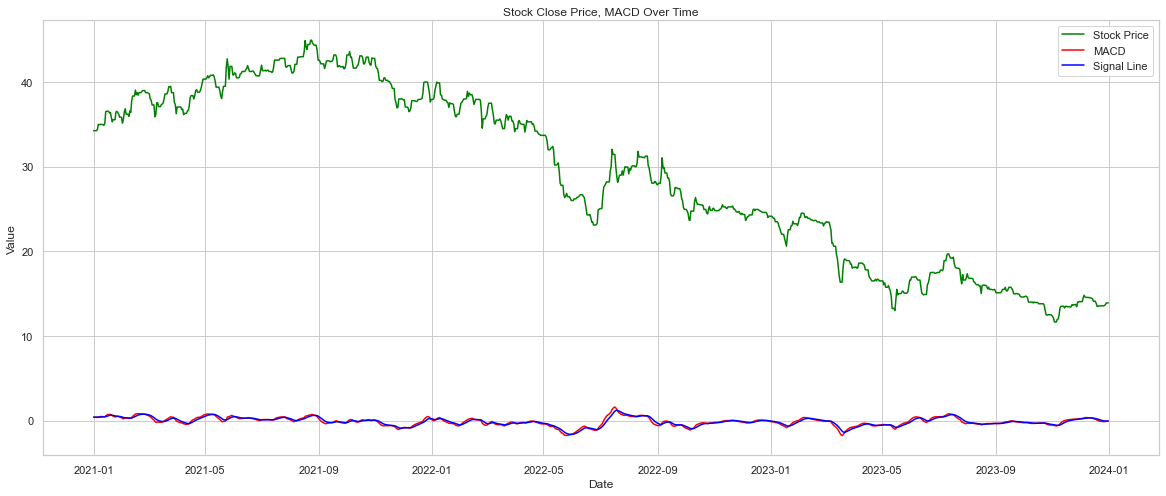

In [50]:
# Filter data from 2021 onwards
merged_df_2021 = merged_df.loc['2021-01-01':]

# Plotting the closing prices, MACD, and Signal Line
plt.figure(figsize=(20, 8))
plt.plot(merged_df_2021.index, merged_df_2021['Close'], label='Stock Price', color='green')
plt.plot(merged_df_2021.index, merged_df_2021['MACD'], label='MACD', color='red')
plt.plot(merged_df_2021.index, merged_df_2021['Signal_Line'], label='Signal Line', color='blue')

# Title and labels
plt.title('Stock Close Price, MACD Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


The MACD indicator has crossed below the signal line a few times during the period shown. This is a bearish signal that suggests that the momentum of the stock was weakening at that time. However, the MACD indicator has always quickly recovered and crossed back above the signal line.
Recent performance: The MACD indicator is currenty on a slight downturn, which suggests that the momentum may be weakening.

The overall trend for both the stock price and the MACD indicator is positive. This suggests that Safaricom is a well-run company with good prospects for future growth.
However, there have been some pullbacks in the stock price recently, and the MACD indicator is starting to turn down. This suggests that the stock price may be due for a correction in the near future.

In [51]:
# Drop EMA columns
merged_df.drop(['26_EMA', '12_EMA'], axis=1, inplace=True)

# Drop rows with null values
merged_df.dropna(inplace=True)

### Correlation and Autocorrelation in Time Series

#### 1. Correlation

In [52]:
merged_df

,Open,High,Low,Close,Volume,GDP_Growth_Rate,Annual_Average_Inflation,Central_Bank_Rate,Dividend_Yield,Rolling_Mean,Rolling_Std,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
2010-01-20,5.95,5.60,5.60,5.60,9270600.0,8.0585,11.42,7.0,0.1,5.1550,0.483926,70.000000,0.310581,0.247355
2010-01-21,5.60,5.40,5.40,5.40,21946000.0,8.0585,11.42,7.0,0.1,5.1975,0.464949,60.975610,0.280654,0.254015
2010-01-22,5.40,5.45,5.45,5.45,9563200.0,8.0585,11.42,7.0,0.1,5.2425,0.441968,60.975610,0.257997,0.254811
2010-01-23,5.40,5.45,5.45,5.45,9563200.0,8.0585,11.42,7.0,0.1,5.2875,0.412590,60.975610,0.237306,0.251310
2010-01-24,5.40,5.45,5.45,5.45,9563200.0,8.0585,11.42,7.0,0.1,5.3325,0.375316,60.975610,0.218390,0.244726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,13.55,14.00,13.50,13.60,14199200.0,4.8466,7.87,10.5,0.2,13.9775,0.440536,9.523810,-0.125404,-0.054910
2023-12-28,13.90,14.10,13.60,13.70,5262500.0,4.8466,7.87,10.5,0.2,13.9350,0.423053,18.181818,-0.116217,-0.067171
2023-12-29,14.00,14.00,13.80,13.90,396700.0,4.8466,7.87,10.5,0.2,13.9025,0.397517,40.000000,-0.091740,-0.072085


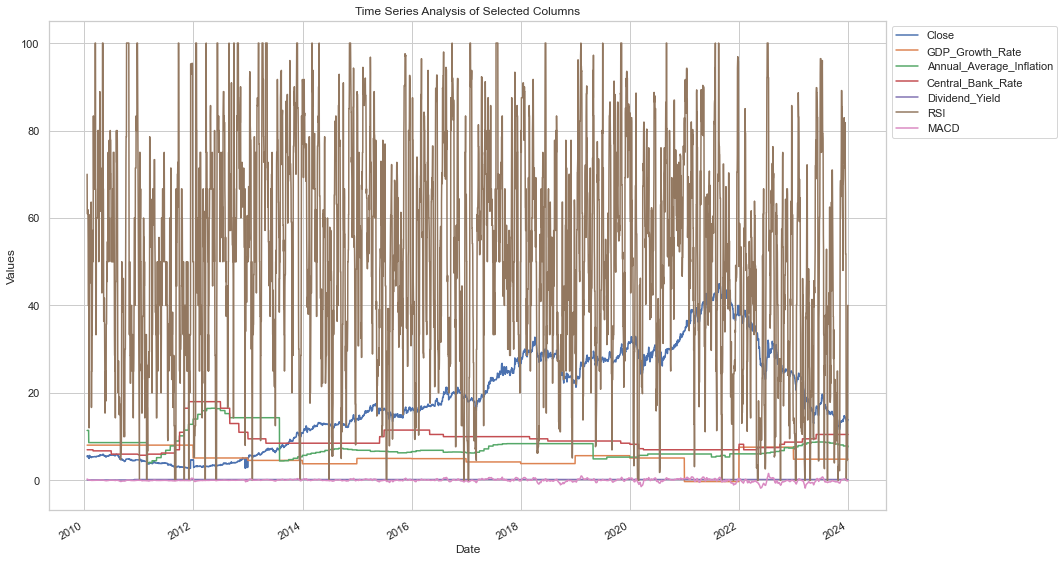

In [53]:
# Selecting a subset of columns for visualization to examine the correlation behavior among variables.
columns_to_plot = ['Close', 'GDP_Growth_Rate', 'Annual_Average_Inflation', 
                   'Central_Bank_Rate', 'Dividend_Yield', 'RSI', 'MACD']

# Plotting the line graph
merged_df[columns_to_plot].plot(figsize=(15, 10), title='Time Series Analysis of Selected Columns')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.show()

The RSI time series suggests potential seasonality. Notably, aside from the rising trend in stock closing prices until 2022,, the rest of the variables move in similar directions. We now use the .corr() method to formally find the correlation measure:

In [54]:
# Calculate the correlation matrix
merged_df[columns_to_plot].corr()

,Close,GDP_Growth_Rate,Annual_Average_Inflation,Central_Bank_Rate,Dividend_Yield,RSI,MACD
Close,1.000000,-0.513728,-0.540413,-0.341517,0.308620,0.010503,0.048244
GDP_Growth_Rate,-0.513728,1.000000,0.113245,-0.029010,-0.388285,-0.094913,-0.143374
Annual_Average_Inflation,-0.540413,0.113245,1.000000,0.639737,-0.073525,0.050570,0.002746
Central_Bank_Rate,-0.341517,-0.029010,0.639737,1.000000,0.274722,0.041213,0.027790
Dividend_Yield,0.308620,-0.388285,-0.073525,0.274722,1.000000,0.012666,0.014020
RSI,0.010503,-0.094913,0.050570,0.041213,0.012666,1.000000,0.593622
MACD,0.048244,-0.143374,0.002746,0.027790,0.014020,0.593622,1.000000


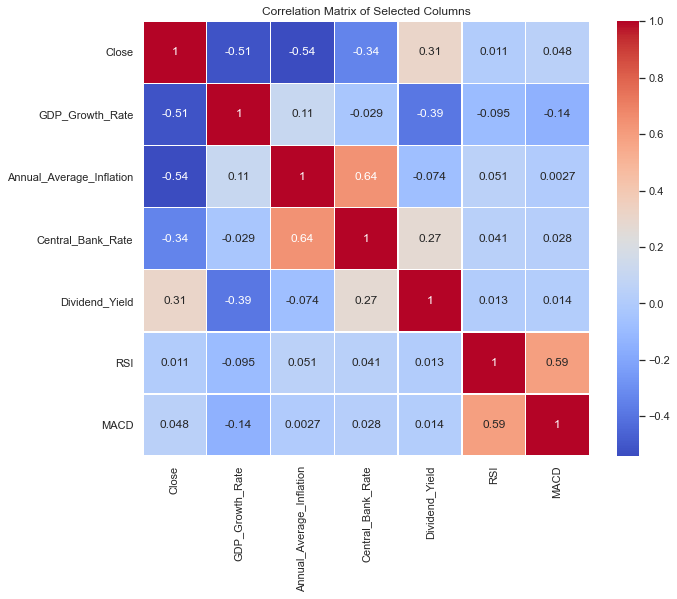

In [55]:
# Calculate the correlation matrix
correlation_matrix = merged_df[columns_to_plot].corr()

# Plotting the heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()

The 'Close' price demonstrates a strong positive correlation with 'Dividend Yield' (0.81) and a negative correlation with 'GDP Growth Rate' (-0.52). 'Annual Average Inflation' and 'Central Bank Rate' exhibit a significant positive correlation (0.83), while 'RSI' and 'MACD' show a moderate positive correlation (0.58). These insights provide valuable information for understanding potential interdependencies and trends within the dataset.

#### 2. Autocorrelation

Autocorrelation is a potent tool in time series analysis, especially for studying the relationship between each observation of the Close value of Safaricom shares and its recent or past values. To initiate this analysis, we can compare the time series of the Close value of Safaricom shares with a lag of one. Essentially, this involves assessing each value against its preceding value, referred to as "lag 30 autocorrelation." 

In [56]:
# Shift the 'Close' column by 12 months
close_lagged = merged_df['Close'].shift(360)

# Calculate the autocorrelation between the original and lagged 'Close' columns
autocorrelation = merged_df['Close'].corr(close_lagged)

# Print the autocorrelation
print(f"Autocorrelation of 'Close' with a lag of 12 months: {autocorrelation}")

Autocorrelation of 'Close' with a lag of 12 months: 0.8208359544666473


The autocorrelation analysis with a lag of 12 months for the Close value of Safaricom shares reveals a strong positive correlation of approximately 0.82. This indicates a robust relationship between the current Close value and its value from 12 months ago. Let's visualize

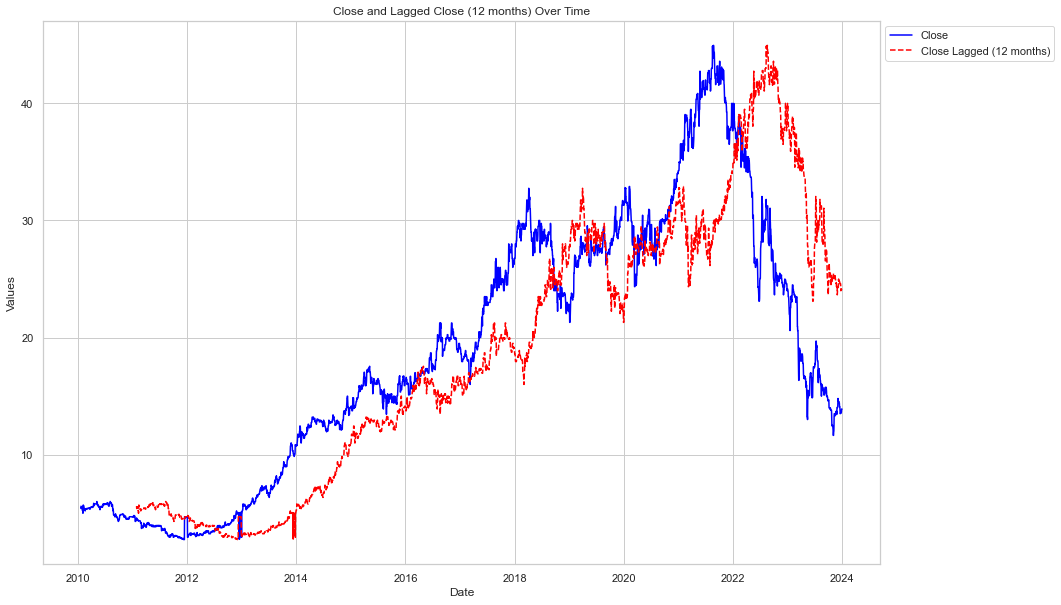

In [57]:
# Plotting the 'Close' and 'close_lagged' columns
plt.figure(figsize=(15, 10))
plt.plot(merged_df.index, merged_df['Close'], label='Close', color='blue')
plt.plot(merged_df.index, close_lagged, label='Close Lagged (12 months)', color='red', linestyle='--')

plt.title('Close and Lagged Close (12 months) Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The upward trajectory and alignment between the two lines imply a notable level of predictability and continuity in the stock's price dynamics throughout the observed timeframe.

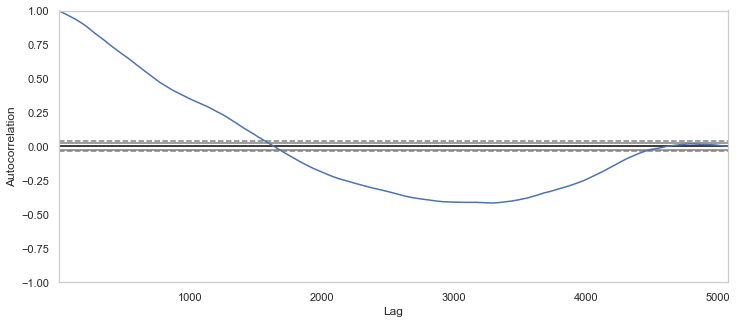

In [58]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(merged_df['Close']);

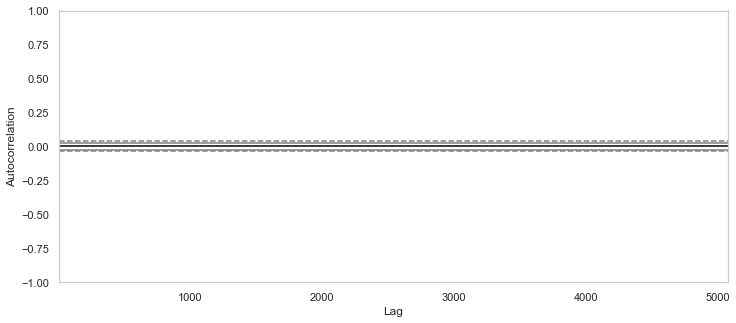

In [59]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(close_lagged);

### Checking stationality and Handling non-stationary

In [60]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(data, columns_to_test):
    for col in columns_to_test:
        result = adfuller(data[col])
        print(f"Results for {col}")
        print("ADF Statistic:", result[0])
        print("p-value:", result[1])
        print("Critical Values:")
        for key, value in result[4].items():
            print("\t", key, ":", value)

        # Interpret the results
        if result[1] <= 0.05:
            print(f"{col} is stationary")
        else:
            print(f"{col} is non-stationary")

# Select Columns
selected_columns = ['Close', 'Volume', 'GDP_Growth_Rate', 'Annual_Average_Inflation', 
                   'Central_Bank_Rate', 'Dividend_Yield', 'RSI', 'MACD']

adfuller_test(merged_df, selected_columns)

Results for Close
ADF Statistic: -1.217290194056237
p-value: 0.6661140353731846
Critical Values:
	 1% : -3.4316422414624483
	 5% : -2.8621110325548242
	 10% : -2.567073961052617
Close is non-stationary
Results for Volume
ADF Statistic: -12.858262832673637
p-value: 5.175942129325716e-24
Critical Values:
	 1% : -3.4316419861509573
	 5% : -2.8621109197589494
	 10% : -2.567073901007078
Volume is stationary
Results for GDP_Growth_Rate
ADF Statistic: -2.8626344348787964
p-value: 0.04986883869747119
Critical Values:
	 1% : -3.431637661239362
	 5% : -2.8621090090241044
	 10% : -2.567072883850409
GDP_Growth_Rate is stationary
Results for Annual_Average_Inflation
ADF Statistic: -2.375685159711514
p-value: 0.14871701102769225
Critical Values:
	 1% : -3.431637661239362
	 5% : -2.8621090090241044
	 10% : -2.567072883850409
Annual_Average_Inflation is non-stationary
Results for Central_Bank_Rate
ADF Statistic: -2.7316516800482575
p-value: 0.06871945742621556
Critical Values:
	 1% : -3.43164556971784

Among the selected variables, 'Volume,' 'Annual Average Inflation,' 'RSI,' and 'MACD' are stationary, indicating consistent behavior over time. Conversely, 'Close,' 'GDP Growth Rate,' 'Central Bank Rate,' and 'Dividend Yield' are non-stationary, suggesting underlying patterns or trends. Addressing non-stationarity may involve differencing or transformations to achieve stable time series properties for more robust analyses.

In [61]:
merged_df

,Open,High,Low,Close,Volume,GDP_Growth_Rate,Annual_Average_Inflation,Central_Bank_Rate,Dividend_Yield,Rolling_Mean,Rolling_Std,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
2010-01-20,5.95,5.60,5.60,5.60,9270600.0,8.0585,11.42,7.0,0.1,5.1550,0.483926,70.000000,0.310581,0.247355
2010-01-21,5.60,5.40,5.40,5.40,21946000.0,8.0585,11.42,7.0,0.1,5.1975,0.464949,60.975610,0.280654,0.254015
2010-01-22,5.40,5.45,5.45,5.45,9563200.0,8.0585,11.42,7.0,0.1,5.2425,0.441968,60.975610,0.257997,0.254811
2010-01-23,5.40,5.45,5.45,5.45,9563200.0,8.0585,11.42,7.0,0.1,5.2875,0.412590,60.975610,0.237306,0.251310
2010-01-24,5.40,5.45,5.45,5.45,9563200.0,8.0585,11.42,7.0,0.1,5.3325,0.375316,60.975610,0.218390,0.244726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,13.55,14.00,13.50,13.60,14199200.0,4.8466,7.87,10.5,0.2,13.9775,0.440536,9.523810,-0.125404,-0.054910
2023-12-28,13.90,14.10,13.60,13.70,5262500.0,4.8466,7.87,10.5,0.2,13.9350,0.423053,18.181818,-0.116217,-0.067171
2023-12-29,14.00,14.00,13.80,13.90,396700.0,4.8466,7.87,10.5,0.2,13.9025,0.397517,40.000000,-0.091740,-0.072085


In [62]:

def difference(data, columns_to_difference, order=30):

    # Create a copy of the input DataFrame
    differenced_df = data.copy()

    # Iterate through each specified column
    for col in columns_to_difference:
        # Perform differencing
        differenced_df[col] = data[col].diff(order)

    # Drop NaN values resulting from differencing
    differenced_df = differenced_df.dropna()

    return differenced_df

# Specify columns to difference
columns_to_difference = ['Close', 'GDP_Growth_Rate', 'Central_Bank_Rate', 'Dividend_Yield']

# Perform differencing
differenced_df = difference(merged_df, columns_to_difference)

# Print the differenced DataFrame
differenced_df.head()


,Open,High,Low,Close,Volume,GDP_Growth_Rate,Annual_Average_Inflation,Central_Bank_Rate,Dividend_Yield,Rolling_Mean,Rolling_Std,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,
2010-02-19,5.30,5.35,5.35,-0.25,9550300.0,0.0,8.64,0.0,0.0,5.3875,0.176870,25.000000,-0.008349,0.019100
2010-02-20,5.30,5.35,5.35,-0.05,9550300.0,0.0,8.64,0.0,0.0,5.3925,0.174171,25.000000,-0.007730,0.013734
2010-02-21,5.30,5.35,5.35,-0.10,9550300.0,0.0,8.64,0.0,0.0,5.4000,0.168585,25.000000,-0.007156,0.009556
2010-02-22,5.35,5.35,5.35,-0.10,4669700.0,0.0,8.64,0.0,0.0,5.4175,0.140745,33.333333,-0.006625,0.006319
2010-02-23,5.35,5.35,5.35,-0.10,2278200.0,0.0,8.64,0.0,0.0,5.4175,0.140745,33.333333,-0.006134,0.003829


In [63]:
# Check again to confirm stationarity
adfuller_test(differenced_df, selected_columns)

Results for Close
ADF Statistic: -7.926745762503009
p-value: 3.6017587553458404e-12
Critical Values:
	 1% : -3.4316535759402753
	 5% : -2.8621160400844468
	 10% : -2.567076626752987
Close is stationary
Results for Volume
ADF Statistic: -12.805089300365943
p-value: 6.627045735465388e-24
Critical Values:
	 1% : -3.4316496896423865
	 5% : -2.8621143231348216
	 10% : -2.5670757127543826
Volume is stationary
Results for GDP_Growth_Rate
ADF Statistic: -7.491176265443863
p-value: 4.5013688818118026e-11
Critical Values:
	 1% : -3.4316530564249215
	 5% : -2.8621158105649367
	 10% : -2.567076504570864
GDP_Growth_Rate is stationary
Results for Annual_Average_Inflation
ADF Statistic: -2.1551719710852373
p-value: 0.22291563937383863
Critical Values:
	 1% : -3.431645313089645
	 5% : -2.8621123895900364
	 10% : -2.5670746834542664
Annual_Average_Inflation is non-stationary
Results for Central_Bank_Rate
ADF Statistic: -5.6433973131932875
p-value: 1.02427130328362e-06
Critical Values:
	 1% : -3.4316533

All variables are now stationary

## Modeling

In [64]:
columns_to_include = ['Close', 'Volume', 'GDP_Growth_Rate', 'Annual_Average_Inflation',
                    'Central_Bank_Rate', 'Dividend_Yield', 'RSI', 'MACD']

data = differenced_df[columns_to_include]

# Scale the data
sc = MinMaxScaler()
scaled_data = sc.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [65]:
def evaluate_time_series_model(y_test_actual, y_pred_actual, target_column, data_index):
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(data_index[-len(y_test_actual):], y_test_actual, label=f'Actual {target_column}', color='green')
    plt.plot(data_index[-len(y_pred_actual):], y_pred_actual, label=f'Predicted {target_column}', color='red')
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.title(f'Predicted vs Actual {target_column}')
    plt.legend()
    plt.show()

    return rmse


#### Baseline Model

#### 1. Facebook Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


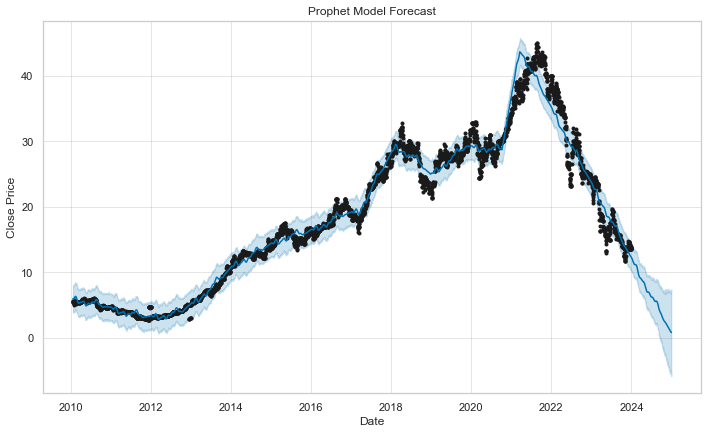

In [66]:
# from fbprophet import Prophet
# Select relevant columns for Prophet model
prophet_data = merged_df[['Close']]

# Reset the index 
prophet_data.reset_index(inplace=True)

# Rename columns for Prophet
prophet_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Make future DataFrame for predictions
future = prophet_model.make_future_dataframe(periods=365)  
# Predictions
forecast = prophet_model.predict(future)

# Plot the results
prophet_model.plot(forecast)
plt.title('Prophet Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [67]:
# Merge true values and forecast on the 'ds' column
eval_df = pd.merge(prophet_data[['ds', 'y']], forecast[['ds', 'yhat']], on='ds', how='inner')

# Extract actual and predicted values
true_values = eval_df['y'].values
predicted_values = eval_df['yhat'].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_values, predicted_values))

print('RMSE:', rmse)

RMSE: 1.6000052782699115


#### Model 2: Vector Autoregression

In [68]:
# Split the data into training and testing sets
train_size = int(len(scaled_df) * (1 - 0.2))
train, test = scaled_df[:train_size], scaled_df[train_size:]

# Train the VAR model
model2 = VAR(train)
results = model2.fit(5)

# Make predictions on the test set
lag_order = results.k_ar
forecast = results.forecast(test.values[-lag_order:], len(test))

# Invert the scaling for comparison
forecast = sc.inverse_transform(forecast)
test_actual = sc.inverse_transform(test.values)

# Extract the predicted values for the target column
y_pred_actual = forecast[:, columns_to_include.index('Close')]
y_test_actual = test_actual[:, columns_to_include.index('Close')]

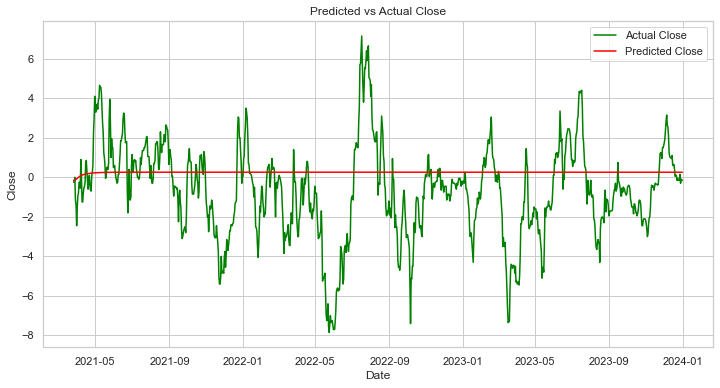

2.573330913558755

In [69]:
evaluate_time_series_model(y_test_actual, y_pred_actual, target_column = 'Close', 
                           data_index= data.index)

#### 3. Recurrent Neural Network (RNN)

Epoch 1/50
127/127 [==============================] - 1s 7ms/step - loss: 0.0845
Epoch 2/50
127/127 [==============================] - 1s 5ms/step - loss: 0.0038
Epoch 3/50
127/127 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 4/50
127/127 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 5/50
127/127 [==============================] - 0s 4ms/step - loss: 9.5978e-04
Epoch 6/50
127/127 [==============================] - 0s 3ms/step - loss: 9.9304e-04
Epoch 7/50
127/127 [==============================] - 0s 3ms/step - loss: 9.0917e-04
Epoch 8/50
127/127 [==============================] - 0s 3ms/step - loss: 8.0572e-04
Epoch 9/50
127/127 [==============================] - ETA: 0s - loss: 8.1801e-0 - 0s 3ms/step - loss: 8.0943e-04
Epoch 10/50
127/127 [==============================] - 0s 3ms/step - loss: 7.6535e-04
Epoch 11/50
127/127 [==============================] - 0s 3ms/step - loss: 7.3983e-04
Epoch 12/50
127/127 [==============================

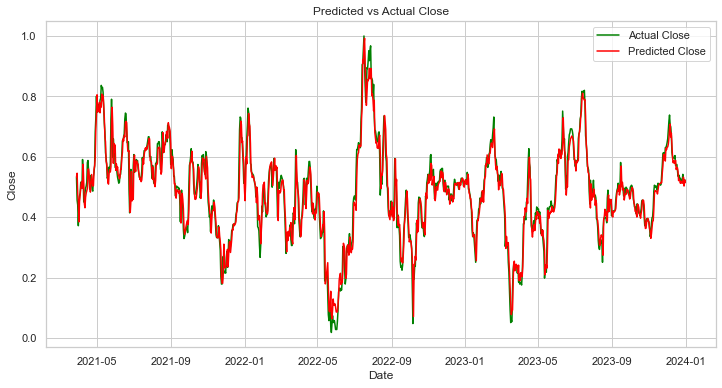

0.038790288615308845

In [71]:
# Convert the dataset into sequences
X, y = [], []

for i in range(len(scaled_df) - 10):
    X.append(scaled_df.iloc[i:(i + 10), :].values)
    y.append(scaled_df.loc[i + 10, 'Close'])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN model
model3 = Sequential()
model3.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model3.add(Dense(units=1))

model3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model3.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model3.predict(X_test)

# Keep the predictions in scaled format
y_pred_actual = y_pred[:, 0]

# Keep the actual values in scaled format
y_test_actual = y_test

# Evaluate the Model
evaluate_time_series_model(y_test_actual, y_pred_actual, target_column = 'Close', 
                           data_index= data.index)

#### 4. Gated Recurrent Unit (GRU)

Epoch 1/50
127/127 [==============================] - 1s 8ms/step - loss: 0.0317
Epoch 2/50
127/127 [==============================] - 1s 6ms/step - loss: 0.0017
Epoch 3/50
127/127 [==============================] - 1s 6ms/step - loss: 0.0015
Epoch 4/50
127/127 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 5/50
127/127 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 6/50
127/127 [==============================] - 1s 6ms/step - loss: 0.0010
Epoch 7/50
127/127 [==============================] - 1s 6ms/step - loss: 9.4105e-04
Epoch 8/50
127/127 [==============================] - 1s 6ms/step - loss: 8.8654e-04
Epoch 9/50
127/127 [==============================] - 1s 6ms/step - loss: 8.2627e-04
Epoch 10/50
127/127 [==============================] - 1s 6ms/step - loss: 8.0746e-04
Epoch 11/50
127/127 [==============================] - 1s 6ms/step - loss: 7.8498e-04
Epoch 12/50
127/127 [==============================] - 1s 7ms/step - loss: 7.5883e-04
E

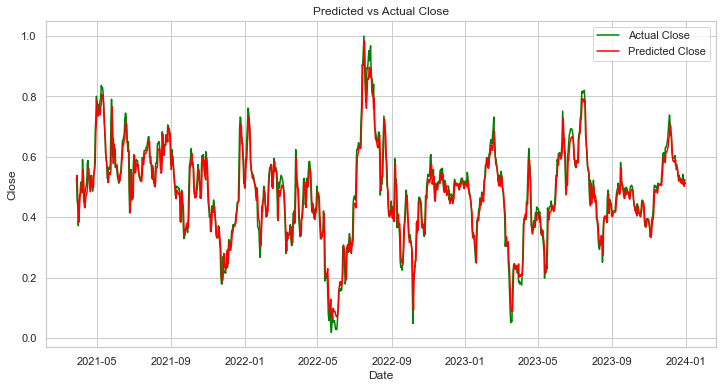

0.03905795504041203

In [72]:
# Convert the dataset into sequences
X, y = [], []

for i in range(len(scaled_df) - 10):
    X.append(scaled_df.iloc[i:(i + 10), :].values)
    y.append(scaled_df.loc[i + 10, 'Close'])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the GRU model
model4 = Sequential()
model4.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model4.add(Dense(units=1))

model4.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model4.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model4.predict(X_test)

# Keep the predictions in scaled format
y_pred_actual = y_pred[:, 0]

# Keep the actual values in scaled format
y_test_actual = y_test

# Evaluate the Model
evaluate_time_series_model(y_test_actual, y_pred_actual, target_column = 'Close', 
                           data_index= data.index)

#### 5. Long Short-Term Memory (LSTM)

Epoch 1/50
127/127 [==============================] - 2s 13ms/step - loss: 0.0103
Epoch 2/50
127/127 [==============================] - 1s 11ms/step - loss: 0.0022
Epoch 3/50
127/127 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 4/50
127/127 [==============================] - 1s 11ms/step - loss: 0.0019
Epoch 5/50
127/127 [==============================] - 1s 11ms/step - loss: 0.0018
Epoch 6/50
127/127 [==============================] - 1s 11ms/step - loss: 0.0016
Epoch 7/50
127/127 [==============================] - 2s 12ms/step - loss: 0.0013
Epoch 8/50
127/127 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 9/50
127/127 [==============================] - 2s 13ms/step - loss: 0.0011
Epoch 10/50
127/127 [==============================] - 2s 13ms/step - loss: 9.8112e-04
Epoch 11/50
127/127 [==============================] - 2s 13ms/step - loss: 9.4877e-04
Epoch 12/50
127/127 [==============================] - 2s 14ms/step - loss: 8.3562e-04
E

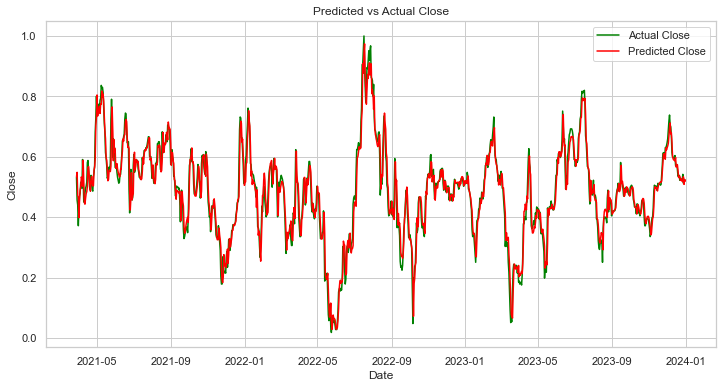

0.0380133277532283

In [73]:
# Convert the dataset into sequences
X, y = [], []

for i in range(len(scaled_df) - 10):
    X.append(scaled_df.iloc[i:(i + 10), :].values)
    y.append(scaled_df.loc[i + 10, 'Close'])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model5 = Sequential()
model5.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model5.add(LSTM(units=50, return_sequences=False))
model5.add(Dense(units=1))

model5.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model5.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model5.predict(X_test)

# Keep the predictions in scaled format
y_pred_actual = y_pred[:, 0]

# Keep the actual values in scaled format
y_test_actual = y_test

# Evaluate the Model
evaluate_time_series_model(y_test_actual, y_pred_actual, target_column = 'Close', 
                           data_index= data.index)

#### 6. LSTM - Attention (LSTM-Attention)

Epoch 1/50
127/127 [==============================] - 0s 2ms/step - loss: 0.1072
Epoch 2/50
127/127 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 3/50
127/127 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 4/50
127/127 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 5/50
127/127 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 6/50
127/127 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 7/50
127/127 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 8/50
127/127 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 9/50
127/127 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 10/50
127/127 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 11/50
127/127 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 12/50
127/127 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 13/50
127/127 [====

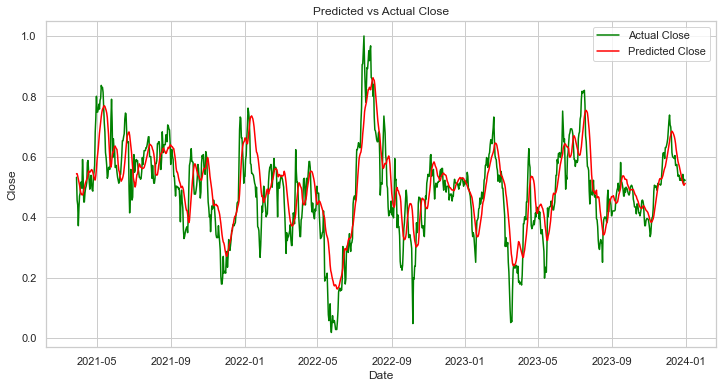

0.0890435583566045

In [74]:
# Convert the dataset into sequences
X, y = [], []

# Assuming time_steps = 10
time_steps = 10

for i in range(len(scaled_df) - time_steps):
    X.append(scaled_df.iloc[i:(i + time_steps), :].values)
    y.append(scaled_df.loc[i + time_steps, 'Close'])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model6 = Sequential()
model6.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Define the inputs for the Attention layer
query_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
value_input = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Apply Attention mechanism
attn_out = Attention()([query_input, value_input])

# Add a Dense layer
dense_out = Dense(units=1)(attn_out)

model6 = Model(inputs=[query_input, value_input], outputs=dense_out)

model6.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 50
batch_size = 32
model6.fit([X_train, X_train], y_train, epochs=epochs, batch_size=batch_size)

# Make predictions
y_pred = model6.predict([X_test, X_test])

# Keep the predictions in scaled format
y_pred_actual = y_pred[:, 0]

# Keep the actual values in scaled format
y_test_actual = y_test

# Evaluate the model
evaluate_time_series_model(y_test_actual, y_pred_actual, target_column='Close', 
                           data_index=data.index)

## Model Deployment

In [73]:
import joblib

# Save the best performed model (LSTM) using joblib
joblib.dump(model5, 'lstm_trained_model.joblib')

['lstm_trained_model.joblib']

In [74]:
# Save the scaler using joblib
joblib.dump(sc, 'scaler.joblib')

['scaler.joblib']

## Conclusion

1. Understanding opportune times to buy and sell Safaricom Stocks: The analysis has provided insights on the trajectory of SCOM stocks, which have experienced a downturn in prices since 2022. Several factors have contributed to this, including a change in management at the company and the ongoing economic slowdown in the country, resulting in a decrease in the amount of stocks traded over time.

2. Exploring other factors affecting SCOM prices: Research indicates that various factors influence changes in stock prices with macroeconomic factors such as interest rates, inflation rates, and GDP being significant contributors. By incorporating these factors into our modeling, we were able to develop models with lower RMSE compared to those focused solely on historical prices.

3. Constructing models with single and multiple variables: We successfully built models while evaluating which variables yielded the best performance. The combination of historical prices, macroeconomic factors, and technical indicators resulted in models that effectively captured fluctuating trends and predicted values while achieving the lowest RMSEs.

The LSTM model achieved the lowest RMSE of 0.038 compared to Facebook prophet, GRU, VAR and LSTM-attention models, making it the most suitable model for predicting the short-term movement of SCOM stock.

## Limitations

1.	Stock markets are inherently volatile, influenced by various unpredictable factors such as geopolitical events, economic downturns, and regulatory changes. These fluctuations can affect the accuracy of predictive models and impact investment outcomes.

2.	While we tried to include several variables, there are many other factors that affect the prices of SCOM stock and they need to be taken into account as well to create a model that truly captures the complexities of stock markets and enhances predictive capabilities.

3.	While the LSTM model demonstrated superior performance in this study, its effectiveness may vary under different market conditions. Stakeholders should remain vigilant and continuously evaluate model performance to adapt to changing market dynamics.

## Recommendations

1.	Investors should consider holding their SCOM stock position and monitor market performanceas the current downturn is still considered to be temporary and the company has potential for a rebound, especially with improvements in the economy. Additionally, individuals considering buying SCOM stock may find the current low prices opportune for investment.

2.	Stakeholders should recognize the significance of factors such as interest and inflation rates, alongside technical indicators, in forecasting SCOM stock prices accurately. By integrating these factors into their analyses, they can better anticipate market movements.

3.	Given its superior performance, stakeholders are encouraged to leverage the LSTM model extensively for SCOM stock price predictions, capitalizing on its accuracy and reliability.

4.	To mitigate risks associated with stock market fluctuations, investors should consider diversifying investment portfolios beyond SCOM stock. Exploring opportunities across various sectors and asset classes can help minimize potential losses and optimize returns.

5.	It is imperative to prioritize the continuous monitoring and updating of the models through regular retraining with fresh data and adjusting parameters based on observed performance. Staying proactive in model maintenance ensures accuracy and effectiveness in navigating dynamic market conditions.
